Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


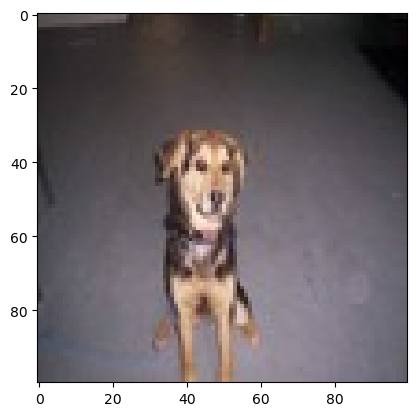

Epoch 1/7
32/32 [==============================] - 12s 151ms/step - loss: 0.7077 - accuracy: 0.5210
Epoch 2/7
32/32 [==============================] - 5s 147ms/step - loss: 0.6624 - accuracy: 0.6195
Epoch 3/7
32/32 [==============================] - 5s 148ms/step - loss: 0.5746 - accuracy: 0.7075
Epoch 4/7
32/32 [==============================] - 5s 145ms/step - loss: 0.4998 - accuracy: 0.7665
Epoch 5/7
32/32 [==============================] - 5s 168ms/step - loss: 0.4426 - accuracy: 0.8030
Epoch 6/7
32/32 [==============================] - 5s 166ms/step - loss: 0.3817 - accuracy: 0.8255
Epoch 7/7
13/13 [==============================] - 1s 32ms/step - loss: 0.5710 - accuracy: 0.7150


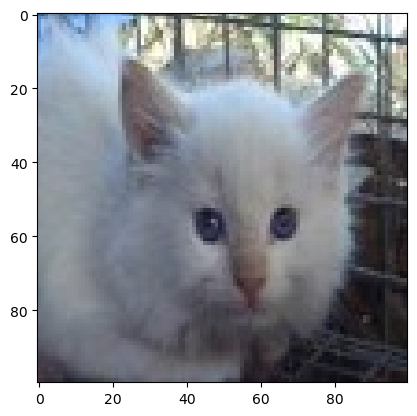

1/1 [==============================] - 1s 692ms/step
[[0.532385]]
Our model says it is a: cat


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D ,Dense,Flatten
import numpy as np
import matplotlib.pyplot as plt
import random

#Load Dataset
X_train=np.loadtxt('C:/Users/priti/Desktop/Assignment_3/input.csv', delimiter =',')
Y_train=np.loadtxt('C:/Users/priti/Desktop/Assignment_3/labels.csv',delimiter =',')
X_test=np.loadtxt('C:/Users/priti/Desktop/Assignment_3/input_test.csv',delimiter =',')
Y_test=np.loadtxt('C:/Users/priti/Desktop/Assignment_3/labels_test.csv', delimiter =',')

#Reshaping appropriate size..removing comma
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train= Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test= Y_test.reshape(len(Y_test),1)

print("Shape of X_train:", X_train.shape) #2000 train images 400 given for testing
print("Shape of Y_train:", Y_train.shape) #imagesize is(100*100)pixels*3RGB Channels
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

X_train[1]

#Feature Scaling rescale to 0 and 1
X_train=X_train/255.0
X_test = X_test/255.0

X_train[1]

#display image
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

#Model Building
model = Sequential([                           #layers are in seq..cnv..max..con
    Conv2D(32, (3,3), activation ='relu', input_shape = (100,100,3)),#filter,filter size height and width,input shape for first layer
    MaxPooling2D((2,2)),    #filtersize 
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation = 'relu'), # 64 number of neurons we want in that layer
    Dense(1,activation ='sigmoid') #we want only 1 Output as it is binary..binary so Sigmoid
])

#2 ways of defining model
model= Sequential()
model.add(Conv2D(32, (3,3), activation ='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation ='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer ='adam', metrics =['accuracy'])

model.fit(X_train,Y_train,epochs=7, batch_size =64 )

model.evaluate(X_test,Y_test)

#Making Predictions
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)
y_pred = y_pred>0.5

if(y_pred == 0):
    pred ='dog'
else:
    pred='cat'
print("Our model says it is a:", pred)




